In [202]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from ipywidgets import interact
from os import path

In [88]:
def Gz_eq3(z_arr,a,b):
    ''' solves a cubic equation for G(z) numerically'''
    '''less efficient, but more reliable'''
    if isinstance(z_arr, list):
        z4=np.zeros(len(z_arr))
        for i_z in range(len(z_arr)):
            z= z_arr[i_z]
            z4[i_z]=np.imag(np.roots([z,b-1,a-z,1]))[1]
    else:
        z4=np.imag(np.roots([z_arr,b-1,a-z_arr,1]))[1]
    return np.abs(z4)

def Gz_eq4(z_arr,a,b):
    ''' solves a quartic equation for G(z) numerically'''
    '''less efficient, but more reliable'''
    if isinstance(z_arr, list):
        z1=np.zeros(len(z_arr))
        z2=np.zeros(len(z_arr))
        z3=np.zeros(len(z_arr))
        z4=np.zeros(len(z_arr))
        for i_z in range(len(z_arr)):
            z= z_arr[i_z]
            z1[i_z]=np.imag(np.roots([1,z+a,b-1,a-z,1]))[0]
            z2[i_z]=np.imag(np.roots([1,z+a,b-1,a-z,1]))[1]
            z3[i_z]=np.imag(np.roots([1,z+a,b-1,a-z,1]))[2]
            z4[i_z]=np.imag(np.roots([1,z+a,b-1,a-z,1]))[3]
    else:
        z4=np.imag(np.roots([1,z_arr+a,b-1,a-z_arr,1]))[1]
#     return np.abs(z4)
    return np.abs(z1),np.abs(z2),np.abs(z3),np.abs(z4)


def Gz(z,a,b):
    '''Direct solution to G(z), faster but has numerical instability for large V
    a=  Lb/L2
    b=  Lb*L1/L2
    '''
    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    T= (R-D**0.5 +1j*0)**(1/3)
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.abs(np.imag(z4))



def plot_spectrum(V=8,Ra=1,R12=0.5):
    ''' plots the spectral density of partial transpose'''
    '''
    L1 subsystem A1 of N1 qubits
    L2 subsystem A2 of N2 qubits
    => LA=L1*L2
    Lb subsystem B of Nb qubits
    V= N1+N2+Nb total number of qubits (system size)
    R12= N1/(N1+N2), we assume L1<L2, i.e., 0<R12<0.5
    Ra= (N1+N2)/V
    '''
    r=2 # local Hilbert space dim
    a= r**((1-Ra)*V-(1-R12)*Ra*V) # Lb/L2
    b= a*r**(R12*Ra*V) # Lb L1/L2
    fx =  1/a
    fy =  1/(pi*fx)
#     fx =  1/(a/r**(R12*Ra*V))
#     fy =  pi/fx

    xplot=np.linspace(-1,1,1000)*1e2/fx+1j*0
#     yplot=Gz_eq3(np.ndarray.tolist(xplot),a+1j*0,b+1j*0)
    yplot=Gz(xplot,a+1j*0,b+1j*0)
#     plt.plot(np.real(xplot)*fx,fy*yplot)
    plt.plot(np.real(xplot)*fx/r**(Ra*V),fy*yplot)
    plt.title('Critical $R_{12}$: $1/2-\delta=$ %.2f' % (1-1/(2*Ra)) )
#     plt.ylim(0,0.04)
    plt.xlabel(r'$L_A\xi$')
    plt.ylabel('Spectral Density')
    plt.show()

interact(plot_spectrum, V=(4,16,2), Ra=1, R12=(0,0.5,0.01));

interactive(children=(IntSlider(value=8, description='V', max=16, min=4, step=2), IntSlider(value=1, descripti…

In [326]:
from scipy.special import *

V=10
Ra=1 #80/V
R12=(1-1/(2*Ra))
r=2 # local Hilbert space dim
a= r**((1-Ra)*V-(1-R12)*Ra*V) # Lb/L2
b= a*r**(R12*Ra*V) # Lb L1/L2
fx =  1/a
fy =  1/(pi*fx)
Lab=r**(Ra*V)    
La = r**(Ra*V*R12)    
# y = np.linspace(-1,1,20000)*30
xplot= np.logspace(-6,4,2000)
y=xplot/Lab
z1 = ((16+y**2) * ellipk(1-y**2/16) - 32*ellipe(1-y**2/16) )/(8*pi**2)
z2 = np.real((np.abs(y)*(4-np.abs(y)+0*1j))**0.5/(2*pi*np.abs(y)) )
z =  z1+ z2 

z_an1 = Gz(xplot,a+1j*0,b+1j*0)
# z_an3 = Gz_eq3(np.ndarray.tolist(y),a+1j*0,b+1j*0)
# z1_an4,z2_an4,z3_an4,z4_an4 = Gz_eq4(np.ndarray.tolist(y),a+1j*0,b+1j*0)

# plt.plot(np.real(y)*fx,fy*z_an1)
# plt.plot(np.real(y)*fx,fy*z_an3)
# plt.plot(np.real(y)*fx,fy*z_an4)

# # plt.plot(y/La,z1/La)
# # plt.plot(y/La,z2/La)
# plt.xlim(-0.02,0.02)
# plt.ylim(0,0.08)
# plt.show()

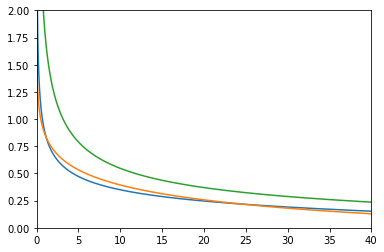

In [287]:

plt.plot(np.real(y)*fx,z_an1/pi)
# plt.plot(np.real(y)*fx,fy*z_an3,'--')
# plt.plot(np.real(y)*fx,fy*z1_an4)
# plt.plot(np.real(y)*fx,fy*z2_an4)
# plt.plot(np.real(y)*fx,fy*z3_an4)
# plt.plot(np.real(y)*fx,fy*z4_an4)

plt.plot(y*La,z1)
plt.plot(y*La,z2)
plt.xlim(0,40)
plt.ylim(0,2)
plt.show()

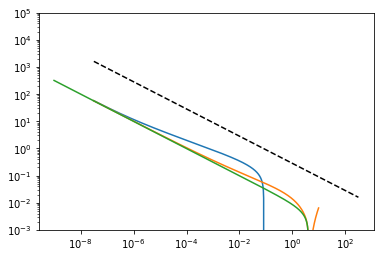

In [327]:
plt.loglog(np.real(y)*fx,z_an1/pi)
# plt.loglog(np.real(y)*fx,z_an3/pi,'o')
# plt.loglog(np.real(y)*fx,.2/y**0.5,'k--')
# plt.loglog(np.real(y)*fx,.3/y**(1/3),'k--')
plt.loglog(np.real(y)*fx,.05/y**(1/2),'k--')

plt.loglog(y,(z1+z2)/La)
plt.loglog(y,z2/La)
# plt.xlim(4e-2,100)
ymin=1e-3
ymax=1e5
# plt.loglog([1/La,1/La],[ymin,ymax],'k--')
plt.ylim(ymin,ymax)
plt.show()

In [210]:
print(R12, R12*Ra*V)

0.25 4.0
